In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_load_lib import get_from_STEAD, get_from_INSTANCE,  get_from_DiTing, get_instance_for_training,train_instance_plot

## Check STEAD

In [2]:
STEAD_csv_file_name = '/mnt/GPT_disk/DL_datasets/STEAD/metadata_eq.csv'
STEADDatasetPath = '/mnt/GPT_disk/DL_datasets/STEAD/waveforms.hdf5'
STEAD_csv = pd.read_csv(STEAD_csv_file_name)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
STEAD_csv.iloc[:5]

,Unnamed: 0,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,...,None,None,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],2896.0,2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,...,None,None,0.91,101.34,281.7,[65. 65.5 61.40000153],5508.0,2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,...,None,None,0.92,101.87,280.5,[37.20000076 42. 38.59999847],3114.0,2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV
3,3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,...,None,None,0.93,103.26,281.6,[54.09999847 54.90000153 45.5 ],3152.0,2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV
4,4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,...,None,None,0.92,102.48,4.7,[58.20000076 56.20000076 53.79999924],3134.0,2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV


B945.PB_20180610113856_EV
(6000, 3)


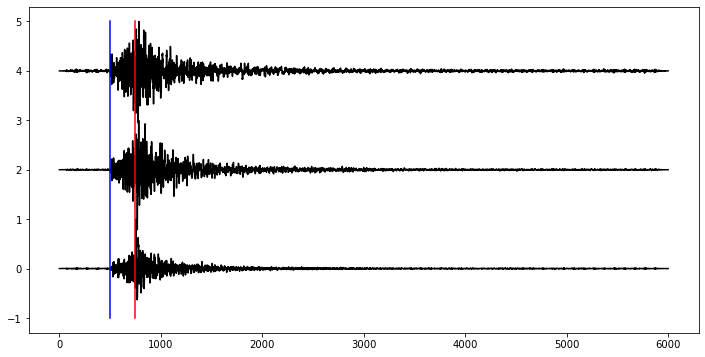

In [4]:
keys = list(STEAD_csv['trace_name'])
choice = np.random.choice(keys)
print(choice)
data, p_t, s_t = get_from_STEAD(key = choice, h5file_path=STEADDatasetPath)
print(np.shape(data))
plt.figure(figsize=(12,6))
# normalize data for plot
for ch_dx in range(np.shape(data)[-1]):
    data[:,ch_dx] -= np.mean(data[:,ch_dx])
    data[:,ch_dx] /= np.max(data[:,ch_dx])
    plt.plot(data[:,ch_dx]+ ch_dx*2,color='k')
plt.plot([p_t,p_t],[-1,5],'b')
plt.plot([s_t,s_t],[-1,5],'r')
#plt.savefig('/home/zhaoming/xzw/DiTIngModelZoo_V2/Debug_imgs/get_from_STEAD.png',dpi=300)
plt.show()
plt.close()

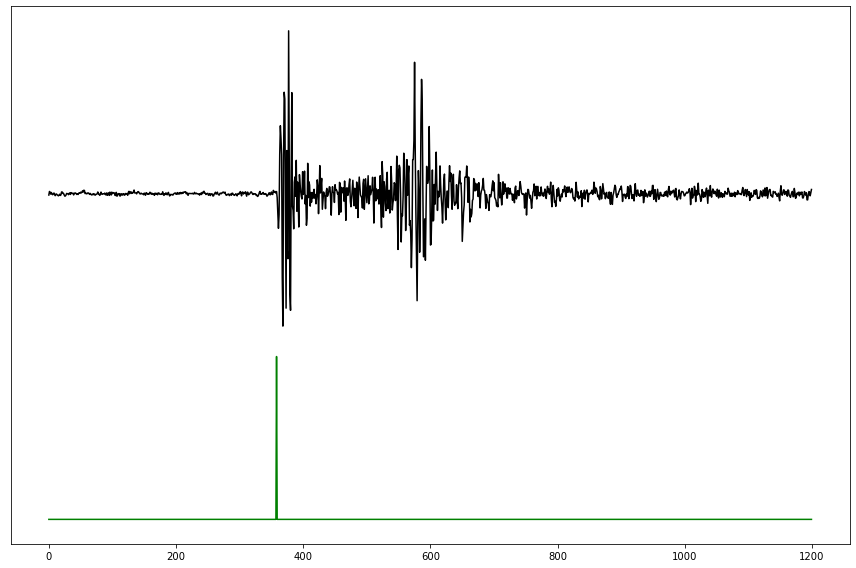

In [5]:
keys = list(STEAD_csv['trace_name'])
choice_key = np.random.choice(keys)
temp_data_X, temp_data_Y = get_instance_for_training(dataset='STEAD',
                                                     dataset_path=STEADDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     key = choice_key,
                                                     wave_type='P',
                                                     shift_max = 400)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/STEAD_P_vis.png')

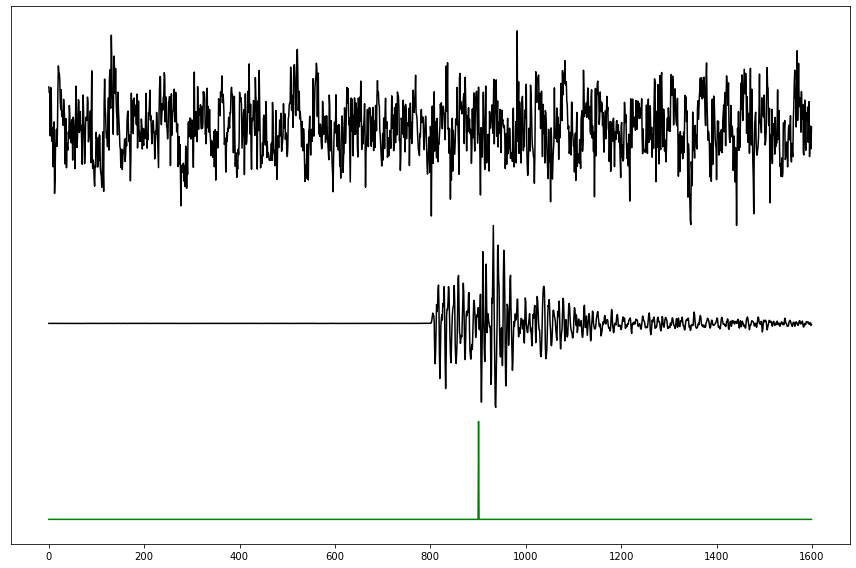

In [6]:
keys = list(STEAD_csv['trace_name'])
choice_key = np.random.choice(keys)
temp_data_X, temp_data_Y = get_instance_for_training(dataset='STEAD',
                                                     dataset_path=STEADDatasetPath,
                                                     data_length = 1600,
                                                     data_channel_num = 2,
                                                     key = choice_key,
                                                     wave_type='S',
                                                     shift_max = 400)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/STEAD_S_vis.png')

## Check INSTANCE

In [7]:
INSTANCEDatasetPath = '/mnt/GPT_disk/DL_datasets/INSTANCE/Instance_events_counts.hdf5'
INSTANCE_csv_file_name = '/mnt/GPT_disk/DL_datasets/INSTANCE/metadata_Instance_events_both_p_s.csv'
INSTANCE_csv = pd.read_csv(INSTANCE_csv_file_name)

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (24,25,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14326211.IV.T1216..EH
(12000, 3)


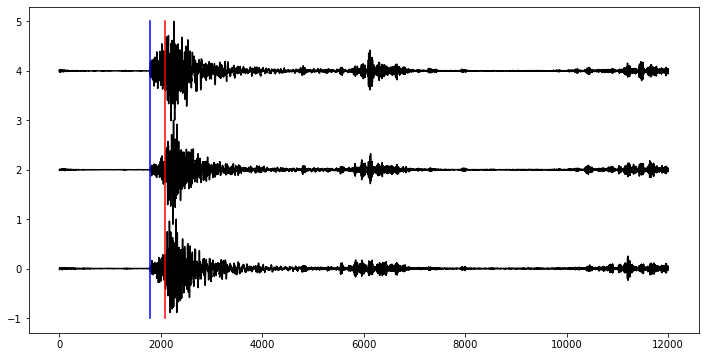

In [8]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.randint(total_lines)
choice_line = INSTANCE_csv.iloc[choice_id]

key = choice_line['trace_name']
print(key)

p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

data = get_from_INSTANCE(key=key, h5file_path=INSTANCEDatasetPath)
data = data.T
print(np.shape(data))
plt.figure(figsize=(12,6))
# normalize data for plot
for ch_dx in range(np.shape(data)[-1]):
    data[:,ch_dx] -= np.mean(data[:,ch_dx])
    data[:,ch_dx] /= np.max(data[:,ch_dx])
    plt.plot(data[:,ch_dx]+ ch_dx*2,color='k')
plt.plot([p_t,p_t],[-1,5],'b')
plt.plot([s_t,s_t],[-1,5],'r')
#plt.savefig('/home/zhaoming/xzw/DiTIngModelZoo_V2/Debug_imgs/get_from_STEAD.png',dpi=300)
plt.show()
plt.close()

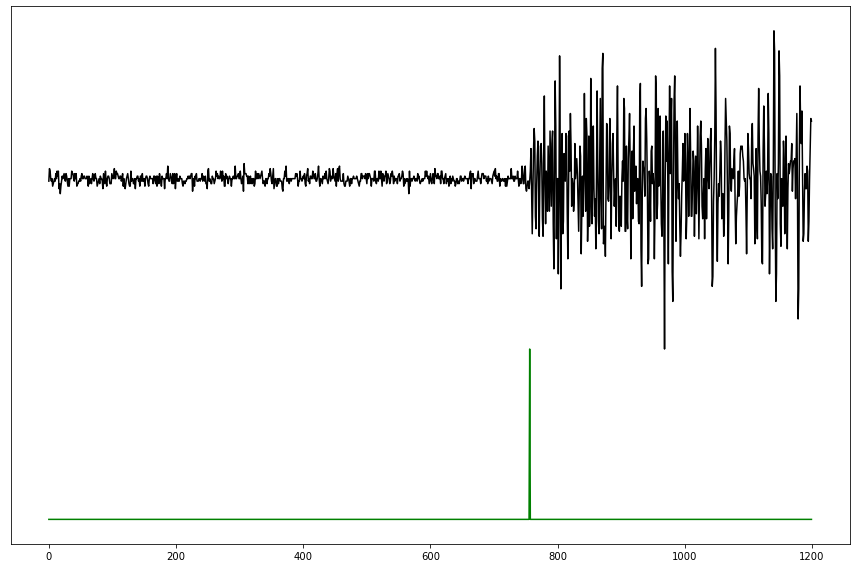

In [9]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.choice(total_lines)

choice_line = INSTANCE_csv.iloc[choice_id]
key = choice_line['trace_name']
p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='INSTANCE',
                                                     dataset_path=INSTANCEDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     key = key,
                                                     wave_type = 'P',
                                                     shift_max = 400,
                                                     p_t = p_t,
                                                     s_t = s_t)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/INSTANCE_P_vis.png')

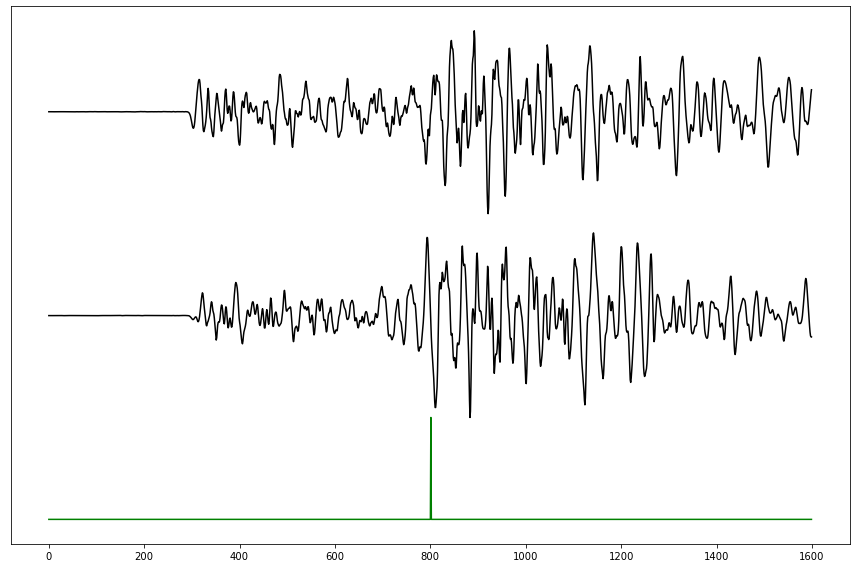

In [10]:
total_lines = len(INSTANCE_csv)
choice_id = np.random.choice(total_lines)

choice_line = INSTANCE_csv.iloc[choice_id]
key = choice_line['trace_name']
p_t = choice_line['trace_P_arrival_sample']
s_t = choice_line['trace_S_arrival_sample']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='INSTANCE',
                                                     dataset_path=INSTANCEDatasetPath,
                                                     data_length = 1600,
                                                     data_channel_num = 2,
                                                     key = key,
                                                     wave_type = 'S',
                                                     shift_max = 1,
                                                     p_t = p_t,
                                                     s_t = s_t)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/INSTANCE_S_vis.png')

# Check DiTing Dataset

In [11]:
DiTingDatasetPath = '/mnt/GPT_disk/DL_datasets/DiTing330km_publish/'
DiTing_csv_file_name = '/mnt/GPT_disk/DL_datasets/DiTing330km_publish/merge.csv'
DiTing_csv = pd.read_csv(DiTing_csv_file_name, dtype = {'key': str})

/public/home/zhaoming/guochang/miniconda3/envs/DiTingDevEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (4,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(20000, 3)


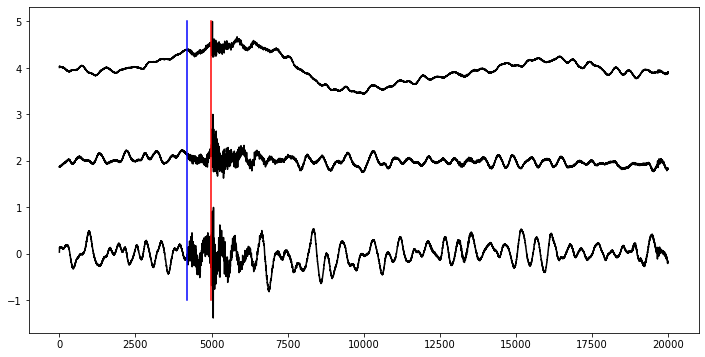

In [12]:
total_lines = len(DiTing_csv)
choice_id = np.random.randint(total_lines)
choice_line = DiTing_csv.iloc[choice_id]

part = choice_line['part']
key = choice_line['key']
key_correct = key.split('.')
key = key_correct[0].rjust(6,'0') + '.' + key_correct[1].ljust(4,'0')
p_t = int(choice_line['p_pick']*100 + 3000)
s_t = int(choice_line['s_pick']*100 + 3000)

data = get_from_DiTing(part=part, key=key, h5file_path=DiTingDatasetPath)
print(np.shape(data))
plt.figure(figsize=(12,6))
# normalize data for plot
for ch_dx in range(np.shape(data)[-1]):
    data[:,ch_dx] -= np.mean(data[:,ch_dx])
    data[:,ch_dx] /= np.max(data[:,ch_dx])
    plt.plot(data[:,ch_dx]+ ch_dx*2,color='k')
plt.plot([p_t,p_t],[-1,5],'b')
plt.plot([s_t,s_t],[-1,5],'r')
#plt.savefig('/home/zhaoming/xzw/DiTIngModelZoo_V2/Debug_imgs/get_from_STEAD.png',dpi=300)
plt.show()
plt.close()

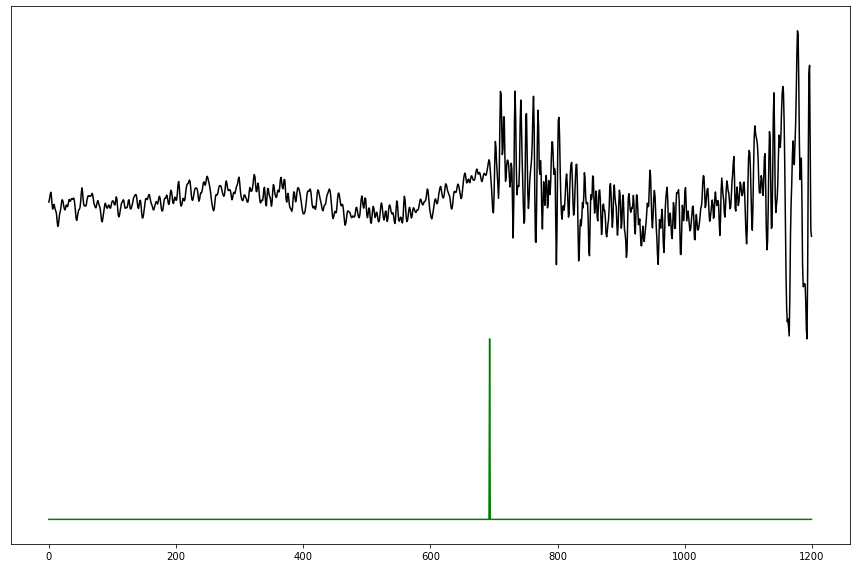

In [13]:
total_lines = len(DiTing_csv)
choice_id = np.random.choice(total_lines)
choice_line = DiTing_csv.iloc[choice_id]
part = choice_line['part']
key = choice_line['key']
key_correct = key.split('.')
key = key_correct[0].rjust(6,'0') + '.' + key_correct[1].ljust(4,'0')
p_t = choice_line['p_pick']
s_t = choice_line['s_pick']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='DiTing',
                                                     dataset_path=DiTingDatasetPath,
                                                     data_length = 1200,
                                                     data_channel_num = 1,
                                                     part = part,
                                                     key = key,
                                                     wave_type = 'P',
                                                     shift_max = 400,
                                                     p_t = p_t,
                                                     s_t = s_t)

check_id = np.random.randint(16)
temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/DiTing_P_vis.png')

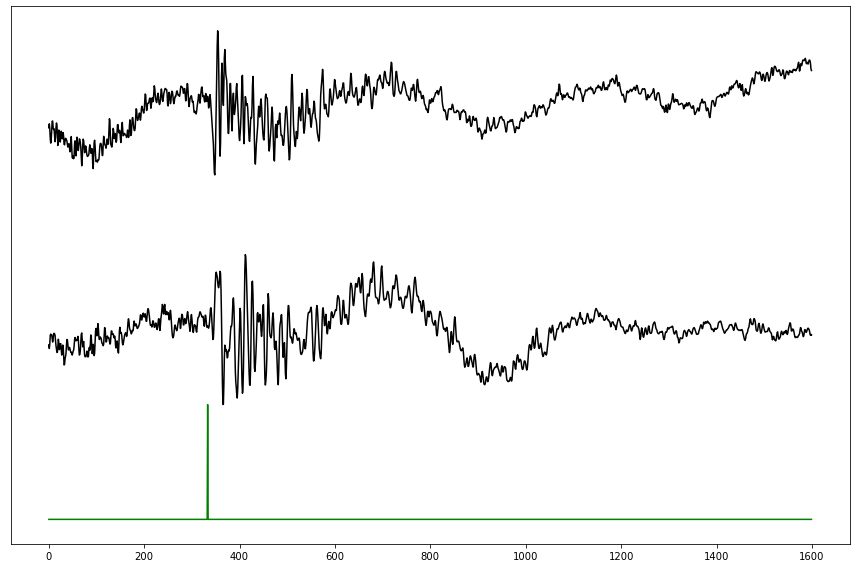

In [14]:
total_lines = len(DiTing_csv)
choice_id = np.random.choice(total_lines)
choice_line = DiTing_csv.iloc[choice_id]
part = choice_line['part']
key = choice_line['key']
key_correct = key.split('.')
key = key_correct[0].rjust(6,'0') + '.' + key_correct[1].ljust(4,'0')
p_t = choice_line['p_pick']
s_t = choice_line['s_pick']

temp_data_X, temp_data_Y = get_instance_for_training(dataset='DiTing',
                                                     dataset_path=DiTingDatasetPath,
                                                     data_length = 1600,
                                                     data_channel_num = 2,
                                                     part = part,
                                                     key = key,
                                                     wave_type = 'S',
                                                     shift_max = 500,
                                                     p_t = p_t,
                                                     s_t = s_t)

temp_data_X = temp_data_X[:,:]
temp_data_Y = temp_data_Y[:,:]    
train_instance_plot(temp_data_X, temp_data_Y, './imgs/DiTing_S_vis.png')